## Preparação dos dados

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('../dataset/diabetes_prediction_dataset.csv')

In [20]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [22]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [23]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [24]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

In [25]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


In [26]:
X = df.drop('diabetes', axis = 1)

y = df['diabetes']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Treino

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
dt_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
lr_classifier = LogisticRegression(max_iter= 1000, random_state=42)

In [30]:
dt_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

import numpy as np

### Decision Tree

In [32]:
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("=== DECISION TREE ===")
print(f"Acurácia: {accuracy_dt:.4f}")
print("Matriz de Confusão:\n", confusion_matrix_dt)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_dt))
print(f"F1-Score (weighted): {f1_dt:.4f}")
print("-" * 30)

=== DECISION TREE ===
Acurácia: 0.9529
Matriz de Confusão:
 [[17815   477]
 [  464  1244]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.72      0.73      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

F1-Score (weighted): 0.9530
------------------------------


### KNN

In [33]:
y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("=== KNN ===")
print(f"Acurácia: {accuracy_knn:.4f}")
print("Matriz de Confusão:\n", confusion_matrix_knn)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))
print(f"F1-Score (weighted): {f1_knn:.4f}")
print("-" * 30)

=== KNN ===
Acurácia: 0.9544
Matriz de Confusão:
 [[18182   110]
 [  802   906]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.53      0.67      1708

    accuracy                           0.95     20000
   macro avg       0.92      0.76      0.82     20000
weighted avg       0.95      0.95      0.95     20000

F1-Score (weighted): 0.9490
------------------------------


### Logistic Regression

In [34]:
y_pred_lr = lr_classifier.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("=== Logistic Regression ===")
print(f"Acurácia: {accuracy_lr:.4f}")
print("Matriz de Confusão:\n", confusion_matrix_lr)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr))
print(f"F1-Score (weighted): {f1_lr:.4f}")
print("-" * 30)

=== Logistic Regression ===
Acurácia: 0.9590
Matriz de Confusão:
 [[18127   165]
 [  654  1054]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

F1-Score (weighted): 0.9559
------------------------------


## Gráficos Comparativos

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

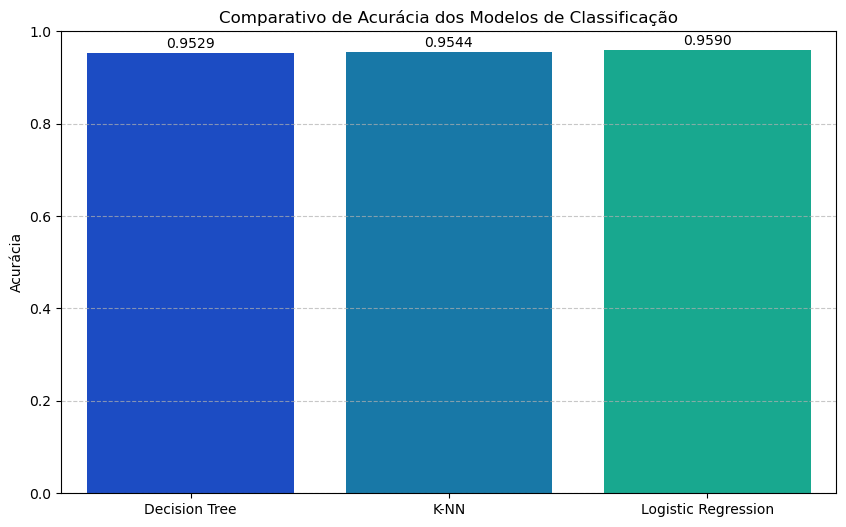

In [36]:
accuracies = {
    'Decision Tree': accuracy_dt,
    'K-NN': accuracy_knn,
    'Logistic Regression': accuracy_lr
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), hue=list(accuracies.keys()), palette='winter')
plt.title('Comparativo de Acurácia dos Modelos de Classificação')
plt.ylabel('Acurácia')
plt.ylim(0, 1)

for i in range(len(accuracies)):
    ax.text(i, accuracies[list(accuracies.keys())[i]] + 0.02,
    f'{accuracies[list(accuracies.keys())[i]]:.4f}',
    ha='center', va='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

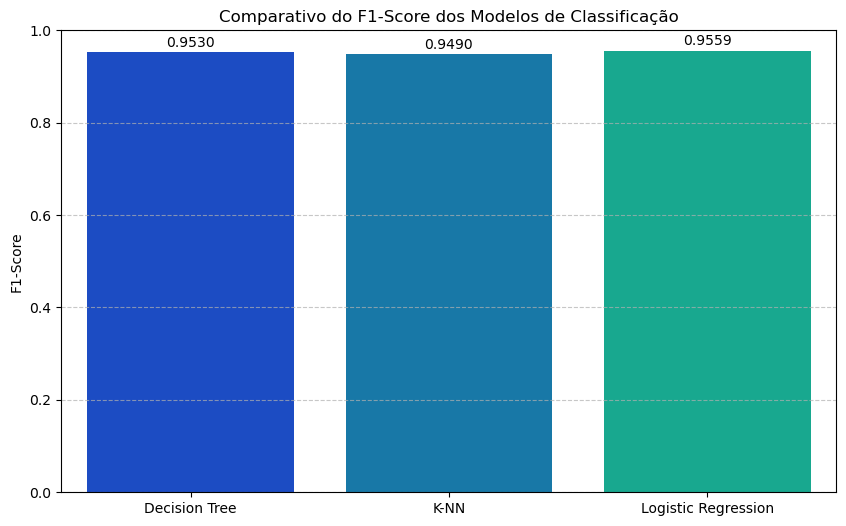

In [37]:
scores_f1 = {
    'Decision Tree': f1_dt,
    'K-NN': f1_knn,
    'Logistic Regression': f1_lr
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(scores_f1.keys()), y=list(scores_f1.values()), hue=list(scores_f1.keys()), palette='winter')
plt.title('Comparativo do F1-Score dos Modelos de Classificação')
plt.ylabel('F1-Score')
plt.ylim(0, 1)

for i in range(len(scores_f1)):
    ax.text(i, scores_f1[list(scores_f1.keys())[i]] + 0.02,
    f'{scores_f1[list(scores_f1.keys())[i]]:.4f}',
    ha='center', va='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()